## 3 Perceptron

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

### Load the modified Iris dataset

In [2]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1).astype(np.float) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 
Y[Y==0] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  0. ]

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [3]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]

X_train = X_shuffled[:100][:,[3,1]] # Shape: (100,2)
X_train = np.delete(X_train, 42, axis=0) # Remove a point for separability.
Y_train = Y_shuffled[:100]          # Shape: (100,)
Y_train = np.delete(Y_train, 42, axis=0) # Remove a point for separability.
X_test = X_shuffled[100:][:,[3,1]]  # Shape: (50,2)
Y_test = Y_shuffled[100:]           # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(99, 2)
(99,)
(50, 2)
(50,)


### Visualization

In [4]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == -1).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1], 
                c='blue', label='class -1')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1], 
                c='red', label='class 1')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

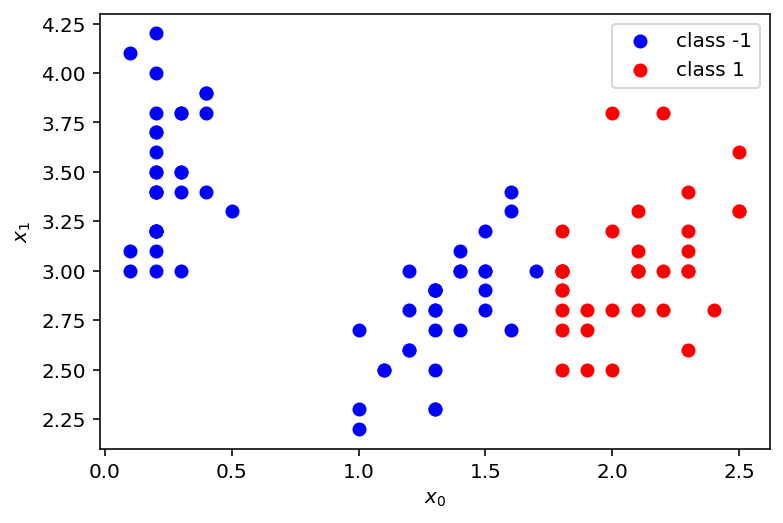

In [5]:
# Visualize training set.
vis(X_train, Y_train)

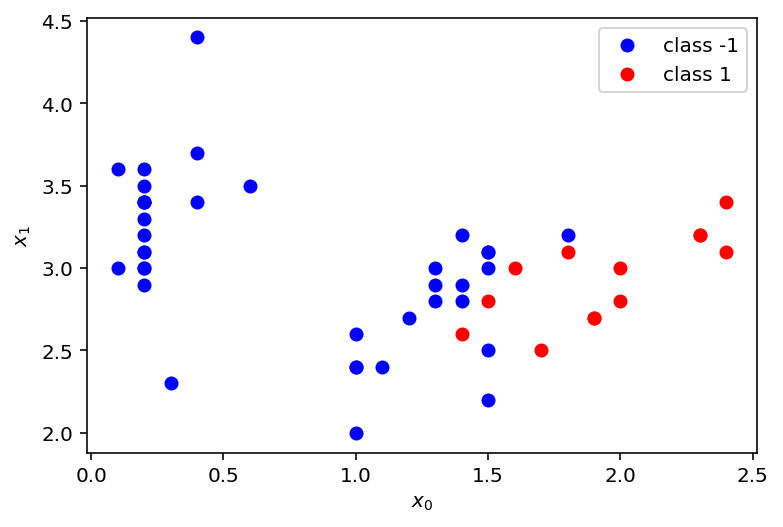

In [6]:
# Visualize test set.
vis(X_test, Y_test)

### 3.1 Perceptron Algorithm-deterministic

In this problem, we would like to train a perceptron model for the classification task on a modified Iris dataset. The training procedure of the perceptron model is shown in the algorithm below:

<img src="perceptron-algorithm.png" width=600 align="left">

Note that in the code, we use `X_train` and `Y_train` to represent the feature vector $X$ and labels $Y$ in training set $S_\text{training}$. Besides, we use `W` and `b` to represent the weight vector $\mathbf{w}$ and bias scalar $b$.

Please fill the blanks of the skeleton code below to complete the perceptron training procedure.


In [7]:
# Judge function: 1(a != b).
## Return TRUE if a==b
## Return FALSE if a!=b
def judge(a, b):
    if a != b:
        return False
    else:
        return True
    
# Check if W.dot(x) + b >= 0
# Perceptron classifier.
def f_perceptron(x, W, b):
    # x should be a 2-dimensional vector, 
    # W should be a 2-dimensional vector,
    # b should be a scalar.
    # you should return a scalar which is -1 or 1.
    res = W.T.dot(x) + b
    if res < 0:
        sign = -1
    else:
        sign = 1
    return sign
    
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, W, b):
    
    # Hint: Use judge() and f_perceptron()
    for (xi, yi) in zip(X, Y):
        yi_pred = f_perceptron(xi, W, b)
        # if yi == yi_pred => error = 0 (in this case -1)
        # else => error = -(1/2)(yi - yi_pred)xi
        if judge(yi_pred, yi):
            err = 0
        else:
            err = (-1/2) * (yi - yi_pred)
    return err
    

In [8]:
# Some settings.
errors = []           # Error history.
lam    = 1            # Lambda which controls the step size.

# Initialization.
W      = np.zeros(2)  # Weight.
b      = 0.0          # Bias.

# Perceptron learning algorithm.
while calc_error(X_train, Y_train, W, b) > 0:
    for xi, yi in zip(X_train, Y_train):   # Iterate over all data points.
        yi_pred = f_perceptron(xi, W, b)  # Compute the model prediction.
        # Compare prediction and label
        ## - If correct, continue.
        if judge(yi, yi_pred):
            continue                       
        ## - If not, update weight and bias.
        else:
            W = W + (yi - yi_pred)*(xi)
            b = b + (yi - yi_pred)
        # Track training errors. 
        errors.append(calc_error(X_train, Y_train, W, b))
    

#### Visualize the results

Decision boundary: 17.600x0+-9.200x1+-4.000=0


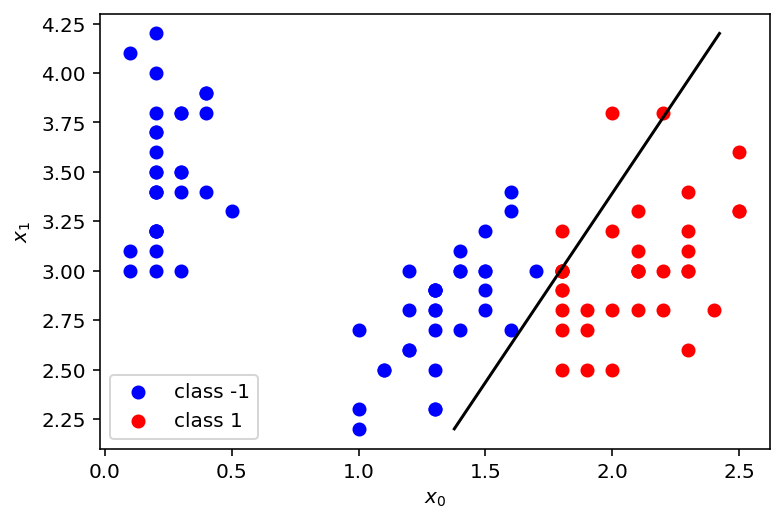

Training error: 0


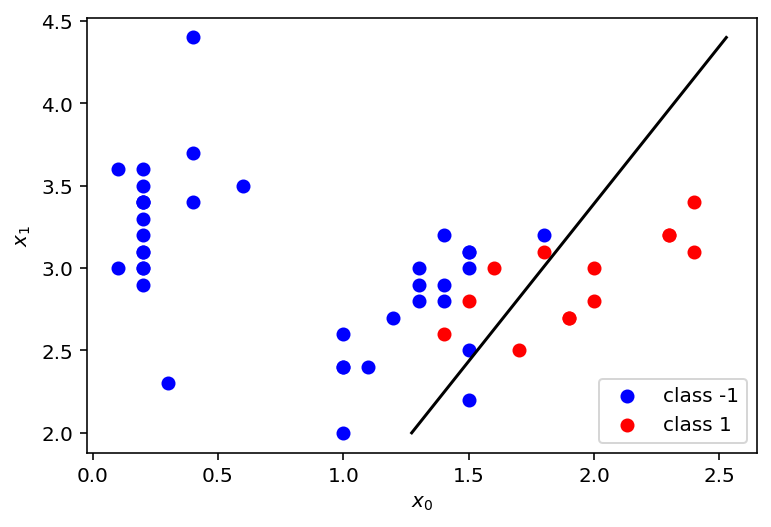

Test error: 0


In [9]:
# Show decision boundary, training error and test error.
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
vis(X_train, Y_train, W, b)
print('Training error: {}'.format(calc_error(X_train, Y_train, W, b)))
vis(X_test, Y_test, W, b)
print('Test error: {}'.format(calc_error(X_test, Y_test, W, b)))

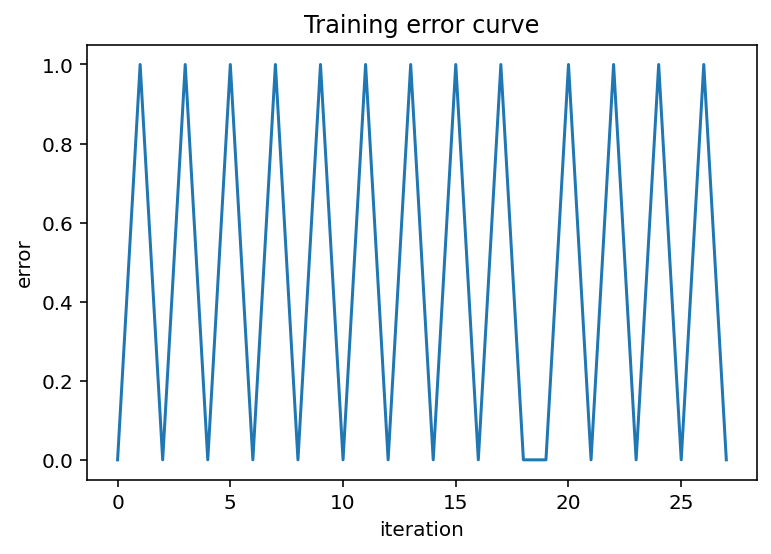

In [11]:
# Plot training error curve.
plt.title('Training error curve')
plt.plot(errors)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

### 3.2 Perceptron Algorithm-random
Please fill the blanks of the skeleton code below to complete the perceptron training procedure.

Most of the code is similar to 3.1 except a random sampling stategy with replacement is applied.
You might have multiple ways to accomplish it. 

$\textbf{Hint}$:  You can randomly sample the indices of training data from 0 to k-1 and then use the index to get corresponding sample each time.

$\texttt{random.choices(pop,n)}$ would return a n sized list of elements chosen from the input list pop with replacement.

In [ ]:
# Some settings.
errors_random = []           # Error history.
lam    = 1                   # Lambda which controls the step size.

# k = length of training data

# Initialization.
W      = np.zeros(2)  # Weight.
b      = 0.0          # Bias.
k      = X_train.shape[0]
# Perceptron learning algorithm.
while calc_error(X_train, Y_train, W, b) > 0:
    ############ To be filled. ############ 
    for i in range(k):   
        xi, yi = ############ To be filled. ############ Select batches randomly
        yi_pred = f_perceptron(xi, W, b)
        if judge(yi, yi_pred):   # Compare prediction and label.
            continue                       # - If correct, continue.
        else:
            W = W + (yi - yi_pred)*xi
            b = b + (yi - yi_pred)
            ####### To be filled #######   # - If not, update weight and bias.
            ####### To be filled ####### 
        # Track training errors. 
        errors_random.append(calc_error(X_train, Y_train, W, b))
    

In [29]:
random.sample(Y_train, k = 99)

TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [ ]:
# Show decision boundary, training error and test error.
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
vis(X_train, Y_train, W, b)
print('Training error: {}'.format(calc_error(X_train, Y_train, W, b)))
vis(X_test, Y_test, W, b)
print('Test error: {}'.format(calc_error(X_test, Y_test, W, b)))

In [ ]:
# Plot training error curve.
plt.title('Training error curve with random update')
plt.plot(errors_random)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()